In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#import DESeq2 Mali results
ASvAAdeseq2_ring = pd.read_csv('../data/in_vivo/DESeq2/ASvAA_Ring_mali_DESeq2_results.csv')
ASvAAdeseq2_ring = ASvAAdeseq2_ring.rename(columns = {"Unnamed: 0" : "ORF"})
ASvAAdeseq2_ring = ASvAAdeseq2_ring.set_index("ORF")
ASvAAdeseq2_troph = pd.read_csv('../data/in_vivo/DESeq2/ASvAA_Troph_mali_DESeq2_results.csv')
ASvAAdeseq2_troph = ASvAAdeseq2_troph.rename(columns={"Unnamed: 0" : "ORF"})
ASvAAdeseq2_troph = ASvAAdeseq2_troph.set_index("ORF")

#import DESeq2 time series results
ts_3D7_deseq2 = pd.read_csv('../data/in_vitro/DESeq2/3D7_DESeq2.csv', index_col=0)
ts_FUP_deseq2 = pd.read_csv('../data/in_vitro/DESeq2/FUP_DESeq2.csv', index_col=0)

GeneID2nt_pfal_df = pd.read_csv('../data/Annotations/ProteinTable33_369845.txt', sep='\t', header = 0)
GeneID2nt_pfal = GeneID2nt_pfal_df.set_index("GeneID")['Locus tag'].to_dict()

### Create lists of significant genes from each strain

In [21]:
minFC = np.log2(1.5)
sig_deseq2_3D7 = ts_3D7_deseq2[(ts_3D7_deseq2['padj'] < 0.05) & (abs(ts_3D7_deseq2['log2FoldChange']) > minFC)]
sigGenes_deseq2_3D7 = sig_deseq2_3D7.index.tolist()
sig_deseq2_FUP = ts_FUP_deseq2[(ts_FUP_deseq2['padj'] < 0.05)  & (abs(ts_FUP_deseq2['log2FoldChange']) > minFC)]
sigGenes_deseq2_FUP = sig_deseq2_FUP.index.tolist()

### Assign parasite stages to time series

In [22]:
d_3D7 = {'HPI': [3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48], 
         'Stage' : ['Ring','Ring','Ring','Ring','Ring','Ring','Ring', 'Ring',
                    'Trophozoite','Trophozoite','Trophozoite','Trophozoite','Trophozoite',
                   'Schizont','Schizont','Schizont']}
stage_3D7 = pd.DataFrame(data=d_3D7)

d_FUP = {'HPI': [3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48], 
         'Stage' : ['Ring','Ring','Ring','Ring','Ring','Ring', 
                    'Trophozoite','Trophozoite','Trophozoite','Trophozoite','Trophozoite','Trophozoite','Trophozoite',
                   'Schizont','Schizont','Schizont']}
stage_FUP = pd.DataFrame(data=d_FUP)

In [23]:
df_3d7 = ts_3D7_deseq2.reset_index()
up_arr_3D7 = []
down_arr_3D7 = []

for i in range(3, 51, 3) :
    hpi=i
    df_up = df_3d7[(df_3d7['padj'] < 0.05) & (df_3d7['log2FoldChange'] > minFC) & (df_3d7['HPI'] == hpi)]['ORF'].value_counts().rename_axis('ORF').reset_index(name='Transcript above threshold')
    df_down = df_3d7[(df_3d7['padj'] < 0.05) & (df_3d7['log2FoldChange'] < -minFC) & (df_3d7['HPI'] == hpi)]['ORF'].value_counts().rename_axis('ORF').reset_index(name='Transcript above threshold')
    up_arr_3D7.append(len(df_up['ORF'].tolist()))
    down_arr_3D7.append(len(df_down['ORF'].tolist()))
up_arr_3D7 = np.array(up_arr_3D7)
down_arr_3D7 = np.array(down_arr_3D7)

In [24]:
df_FUP = ts_FUP_deseq2.reset_index()
up_arr_FUP = []
down_arr_FUP = []

for i in range(3, 51, 3) :
    hpi=i
    df_up = df_FUP[(df_FUP['padj'] < 0.05) & (df_FUP['log2FoldChange'] > minFC) & (df_FUP['HPI'] == hpi)]['ORF'].value_counts().rename_axis('ORF').reset_index(name='Transcript above threshold')
    df_down = df_FUP[(df_FUP['padj'] < 0.05) & (df_FUP['log2FoldChange'] < -minFC) & (df_FUP['HPI'] == hpi)]['ORF'].value_counts().rename_axis('ORF').reset_index(name='Transcript above threshold')
    up_arr_FUP.append(len(df_up['ORF'].tolist()))
    down_arr_FUP.append(len(df_down['ORF'].tolist()))
up_arr_FUP = np.array(up_arr_FUP)
down_arr_FUP = np.array(down_arr_FUP)

Set colors for parasite stages

In [25]:
col1 = sns.color_palette('Set1')[0]
col2 = sns.color_palette('Set1')[1]
col3 = sns.color_palette('Set1')[2]

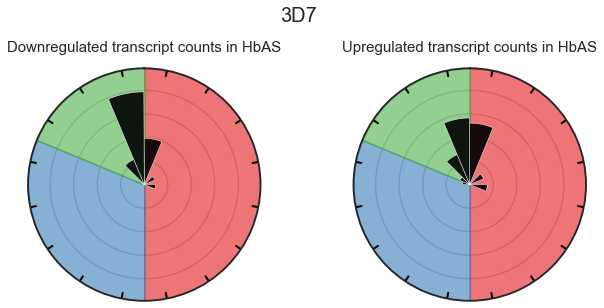

In [26]:
# import numpy as np
# import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_context('talk')
degrees = np.random.randint(0, 360, size=200)
radians = np.deg2rad(degrees)

all_vals = np.append(up_arr_3D7, down_arr_3D7)
max_val = max(all_vals)

bin_size = 22.5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
a = down_arr_3D7
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(10,10))
# ax = fig.add_subplot(111, projection='polar')
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='black', edgecolor='w',alpha=.9, linewidth=.5)
ax1.fill_between(np.linspace(b[0], np.deg2rad(b[8]), 100), 0, max_val+200, color = col1, alpha =.6)
ax1.fill_between(np.linspace(np.deg2rad(b[8]), np.deg2rad(b[13]), 100), 0, max_val+200, color = col2, alpha =.6)
ax1.fill_between(np.linspace(np.deg2rad(b[13]), np.deg2rad(b[16]), 100), 0, max_val+200, color = col3, alpha =.6)
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_ylim([0, max_val+200])
ax1.yaxis.grid(True)
ax1.xaxis.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title('Downregulated transcript counts in HbAS', size = 15)

a = up_arr_3D7
ax2.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='black', edgecolor='w',alpha=.9,linewidth=.5)
ax2.fill_between(np.linspace(b[0], np.deg2rad(b[8]), 100), 0, max_val+200, color = col1, alpha =.6, step = 'pre')
ax2.fill_between(np.linspace(np.deg2rad(b[8]), np.deg2rad(b[13]), 100), max_val+200, color = col2, alpha =.6, step = 'pre')
ax2.fill_between(np.linspace(np.deg2rad(b[13]), np.deg2rad(b[16]), 100), max_val+200, color = col3, alpha =.6, step = 'pre')
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1)
ax2.set_ylim([0, max_val+200])
ax2.yaxis.grid(True)
ax2.xaxis.grid(False)

ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2.set_title('Upregulated transcript counts in HbAS', size = 15)

tick = [ax2.get_rmax(),ax2.get_rmax()*.95]
for t  in np.deg2rad(np.arange(11.25,360,22.5)):
    ax1.plot([t,t], tick, lw=2, color="k")
    ax2.plot([t,t], tick, lw=2, color="k")
    
fig.suptitle('3D7', fontsize=20, y = .75)
plt.subplots_adjust(wspace = 0.4)

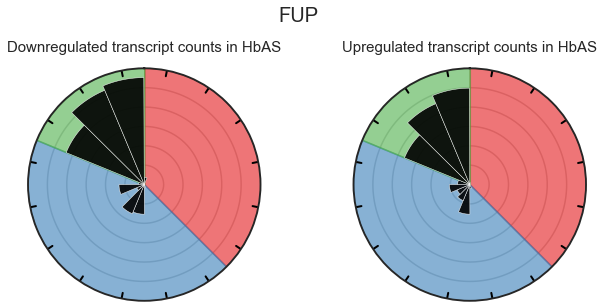

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_context('talk')
degrees = np.random.randint(0, 360, size=200)
radians = np.deg2rad(degrees)

all_vals = np.append(up_arr_FUP, down_arr_FUP)
max_val = max(all_vals)

bin_size = 22.5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
a = down_arr_FUP
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(10,10))
# ax = fig.add_subplot(111, projection='polar')
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='black', edgecolor='w',alpha=.9, linewidth=.5)
ax1.fill_between(np.linspace(b[0], np.deg2rad(b[6]), 100), 0, max_val+100, color = col1, alpha =.6)
ax1.fill_between(np.linspace(np.deg2rad(b[6]), np.deg2rad(b[13]), 100), 0, max_val+100, color = col2, alpha =.6)
ax1.fill_between(np.linspace(np.deg2rad(b[13]), np.deg2rad(b[16]), 100), 0, max_val+100, color = col3, alpha =.6)
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_ylim([0, 1200])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.yaxis.grid(True)
ax1.xaxis.grid(False)
ax1.set_title('Downregulated transcript counts in HbAS', size = 15)

a = up_arr_FUP
ax2.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='black', edgecolor='w',alpha=.9,linewidth=.5)
ax2.fill_between(np.linspace(b[0], np.deg2rad(b[6]), 100), 0, max_val+100, color = col1, alpha =.6)
ax2.fill_between(np.linspace(np.deg2rad(b[6]), np.deg2rad(b[13]), 100), 0, max_val+100, color = col2, alpha =.6)
ax2.fill_between(np.linspace(np.deg2rad(b[13]), np.deg2rad(b[16]), 100), 0, max_val+100, color = col3, alpha =.6)
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1)
ax2.set_ylim([0, 1200])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.yaxis.grid(True)
ax2.xaxis.grid(False)
ax2.set_title('Upregulated transcript counts in HbAS', size = 15)

tick = [ax2.get_rmax(),ax2.get_rmax()*.95]
for t  in np.deg2rad(np.arange(11.25,360,22.5)):
    ax1.plot([t,t], tick, lw=2, color="k")
    ax2.plot([t,t], tick, lw=2, color="k")

fig.suptitle('FUP', fontsize=20, y = .75)
plt.subplots_adjust(wspace = 0.4)

### Identify significant genes in in vivo samples

In [29]:
sig_deseq2_maliRings = ASvAAdeseq2_ring[(ASvAAdeseq2_ring['padj'] < 0.05) & (abs(ASvAAdeseq2_ring['log2FoldChange']) > minFC)]
sigGenes_deseq2_maliRings = sig_deseq2_maliRings.index.tolist()

sig_deseq2_maliTrophs = ASvAAdeseq2_troph[(ASvAAdeseq2_troph['padj'] < 0.05) & (abs(ASvAAdeseq2_troph['log2FoldChange']) > minFC)]
sigGenes_deseq2_maliTrophs = sig_deseq2_maliTrophs.index.tolist()

In [30]:
sigGenes_maliRings = list(set(sigGenes_deseq2_maliRings))
sigGenes_maliTrophs = list(set(sigGenes_deseq2_maliTrophs))
sigGenes_mali = list(set(sigGenes_maliRings).union(set(sigGenes_maliTrophs)))

### Split significant genes into up/downregulated sets

In [31]:
SigDown3D7 = sig_deseq2_3D7[sig_deseq2_3D7['log2FoldChange'] < 0].reset_index()
SigUp3D7 = sig_deseq2_3D7[sig_deseq2_3D7['log2FoldChange'] > 0].reset_index()

SigDownFUP = sig_deseq2_FUP[sig_deseq2_FUP['log2FoldChange'] < 0].reset_index()
SigUpFUP = sig_deseq2_FUP[sig_deseq2_FUP['log2FoldChange'] > 0].reset_index()

In [32]:
vitroUp = list(set(SigUp3D7['ORF'].tolist()).intersection(set(SigUpFUP['ORF'].tolist())))
vitroDown = list(set(SigDown3D7['ORF'].tolist()).intersection(set(SigDownFUP['ORF'].tolist())))

In [33]:
vivoSig_troph = ASvAAdeseq2_troph.loc[sigGenes_maliTrophs]
vivoSig_rings = ASvAAdeseq2_ring.loc[sigGenes_maliRings]
vivoSig = vivoSig_rings.append(vivoSig_troph)

In [34]:
vivoSigUp = vivoSig[vivoSig['log2FoldChange'] > 0]
vivoSigDown = vivoSig[(vivoSig['log2FoldChange'] < 0)]

### Find intersection of up/downregulated differentially expressed genes in vitro and in vivo

In [35]:
expDown = vivoSigDown.reindex(vitroDown).dropna()
expUp = vivoSigUp.reindex(vitroUp).dropna()

In [36]:
expUp.sort_values(by='padj')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes.ORF,genes.GENENAME
ORF,,,,,,,,
PF3D7_1301200,12796.539799,4.791611,0.927621,5.165485,2.398157e-07,0.000132,PF3D7_1301200,glycophorin binding protein (GBPH2)
PF3D7_1401000,143.704016,3.185329,0.833541,3.821442,1.326738e-04,0.016004,PF3D7_1401000,glycophorin binding protein (GBPH)
PF3D7_1353200,7332.404864,1.129629,0.324345,3.482803,4.961930e-04,0.034025,PF3D7_1353200,membrane associated histidine-rich protein (MA...
PF3D7_1370300,13531.736532,1.123496,0.331986,3.384167,7.139454e-04,0.040527,PF3D7_1370300,membrane associated histidine-rich protein (MA...


In [37]:
expDown.sort_values(by='padj')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genes.ORF,genes.GENENAME
ORF,,,,,,,,
PF3D7_0609800,95.069089,-4.857897,1.018069,-4.771679,1.826963e-06,0.000882,PF3D7_0609800,"palmitoyltransferase, putative (DHHC2)"
PF3D7_1115600,1074.608355,-1.925922,0.386788,-4.979267,6.382546e-07,0.003377,PF3D7_1115600,peptidyl-prolyl cis-trans isomerase (CYP19B)
PF3D7_0316200,42.148863,-2.213695,0.626277,-3.534689,4.082555e-04,0.031938,PF3D7_0316200,"conserved Plasmodium protein, unknown function"
PF3D7_1102900,649.625933,-2.510991,0.730324,-3.438186,5.856248e-04,0.036993,PF3D7_1102900,"Plasmodium exported protein (hyp11), unknown f..."
PF3D7_1449200,18.445314,-4.355725,1.278309,-3.407411,6.558232e-04,0.037783,PF3D7_1449200,"conserved Plasmodium protein, unknown function"
PF3D7_0614000,25.224753,-1.699251,0.506125,-3.357375,7.868642e-04,0.042779,PF3D7_0614000,"thiamin-phosphate pyrophosphorylase, putative"


### Read in annotation files for merge with differential expression data

In [38]:
geneIDsGO = pd.read_csv('../data/Annotations/Pfal_gene2go.csv')
annos = pd.read_csv('../data/Annotations/PFD3D7_annos.csv').set_index('Unnamed: 0')

## Prepare 3D7 data by GO term

In [39]:
data_3D7 = ts_3D7_deseq2.reset_index()
data_3D7 = data_3D7.merge(GeneID2nt_pfal_df, 
    left_on='ORF', 
    right_on = 'Locus tag', 
    how='inner')
data_3D7['GeneID'] = data_3D7['GeneID'].astype(int)
data_3D7_GO = data_3D7.merge(geneIDsGO, left_on='GeneID', right_on='GeneID', how = 'inner')

data_3D7_GO['meanLFC_GO'] = data_3D7_GO.groupby(['GO_term', 'HPI'])['log2FoldChange'].transform('mean')

df = data_3D7_GO.groupby(['GO_term', 'HPI']).size().unstack(fill_value=0).iloc[:,0].to_frame()
df = df.rename(columns = {3 : 'Number of transcripts'})
data_3D7_GO = data_3D7_GO.merge(df, left_on = 'GO_term', right_index=True, how='left')
data_GO_mini_3D7 = data_3D7_GO[['ORF', 'baseMean', 'log2FoldChange', 'padj', 'meanLFC_GO', 'genes.GENENAME', 'HPI', 'GO_term', 'Number of transcripts', 'Category']]

hpi=3
df =  data_GO_mini_3D7[(data_GO_mini_3D7['padj'] < 0.05) & (abs(data_GO_mini_3D7['log2FoldChange']) > 0.58) & (data_GO_mini_3D7['HPI'] == hpi)]['GO_term'].value_counts().rename_axis('GO_term').reset_index(name='Number of transcripts above threshold')
data_3D7 = df.merge(data_GO_mini_3D7[data_GO_mini_3D7['HPI'] == hpi], left_on='GO_term', right_on='GO_term', how='right').fillna(0)

for i in range(6, 51, 3) :
    hpi = i
    df =  data_GO_mini_3D7[(data_GO_mini_3D7['padj'] < 0.05) & (abs(data_GO_mini_3D7['log2FoldChange']) > 0.58) & (data_GO_mini_3D7['HPI'] == hpi)]['GO_term'].value_counts().rename_axis('GO_term').reset_index(name='Number of transcripts above threshold')
    df2 = df.merge(data_GO_mini_3D7[data_GO_mini_3D7['HPI'] == hpi], left_on='GO_term', right_on='GO_term', how='right').fillna(0)
    data_3D7 = data_3D7.append(df2)
    

data_3D7['Proportion of transcripts in GO term with p-adj < 0.05'] = data_3D7['Number of transcripts above threshold']/data_3D7['Number of transcripts']
data_3D7 = data_3D7[['GO_term', 'HPI', 'meanLFC_GO', 'Number of transcripts', 'Number of transcripts above threshold', 'Proportion of transcripts in GO term with p-adj < 0.05']].drop_duplicates()
data_3D7 = data_3D7.reset_index(drop=True)

## Prepare FUP data by GO term

In [40]:
data_FUP = ts_FUP_deseq2.reset_index()
data_FUP = data_FUP.merge(GeneID2nt_pfal_df, 
    left_on='ORF', 
    right_on = 'Locus tag', 
    how='inner')
data_FUP['GeneID'] = data_FUP['GeneID'].astype(int)
data_FUP_GO = data_FUP.merge(geneIDsGO, left_on='GeneID', right_on='GeneID', how = 'inner')

data_FUP_GO['meanLFC_GO'] = data_FUP_GO.groupby(['GO_term', 'HPI'])['log2FoldChange'].transform('mean')

df = data_FUP_GO.groupby(['GO_term', 'HPI']).size().unstack(fill_value=0).iloc[:,0].to_frame()
df = df.rename(columns = {3 : 'Number of transcripts'})
data_FUP_GO = data_FUP_GO.merge(df, left_on = 'GO_term', right_index=True, how='left')
data_GO_mini_FUP = data_FUP_GO[['ORF', 'baseMean', 'log2FoldChange', 'padj', 'meanLFC_GO', 'genes.GENENAME', 'HPI', 'GO_term', 'Number of transcripts', 'Category']]

hpi=3
df =  data_GO_mini_FUP[(data_GO_mini_FUP['padj'] < 0.05) & (abs(data_GO_mini_FUP['log2FoldChange']) > 0.58) & (data_GO_mini_FUP['HPI'] == hpi)]['GO_term'].value_counts().rename_axis('GO_term').reset_index(name='Number of transcripts above threshold')
data_FUP = df.merge(data_GO_mini_FUP[data_GO_mini_FUP['HPI'] == hpi], left_on='GO_term', right_on='GO_term', how='right').fillna(0)

for i in range(6, 51, 3) :
    hpi = i
    df =  data_GO_mini_FUP[(data_GO_mini_FUP['padj'] < 0.05) & (abs(data_GO_mini_FUP['log2FoldChange']) > 0.58) & (data_GO_mini_FUP['HPI'] == hpi)]['GO_term'].value_counts().rename_axis('GO_term').reset_index(name='Number of transcripts above threshold')
    df2 = df.merge(data_GO_mini_FUP[data_GO_mini_FUP['HPI'] == hpi], left_on='GO_term', right_on='GO_term', how='right').fillna(0)
    data_FUP = data_FUP.append(df2)
    

data_FUP['Proportion of transcripts in GO term with p-adj < 0.05'] = data_FUP['Number of transcripts above threshold']/data_FUP['Number of transcripts']
data_FUP = data_FUP[['GO_term', 'HPI', 'meanLFC_GO', 'Number of transcripts', 'Number of transcripts above threshold', 'Proportion of transcripts in GO term with p-adj < 0.05']].drop_duplicates()
data_FUP = data_FUP.reset_index(drop=True)

## Create subset of enriched gene ontology terms

In [43]:
data_3D7_sub = data_3D7[(data_3D7['GO_term'] == 'nucleosome') |
                        (data_3D7['GO_term'] == 'cysteine-type peptidase activity') |
                        (data_3D7['GO_term'] == 'tricarboxylic acid cycle') |
                        (data_3D7['GO_term'] == 'endoplasmic reticulum') |
                        (data_3D7['GO_term'] == 'Maurer\'s cleft')]
data_3D7_sub = data_3D7_sub.sort_values(by=['GO_term', 'HPI'])

In [44]:
data_FUP_sub = data_FUP[(data_FUP['GO_term'] == 'nucleosome') |
                        (data_FUP['GO_term'] == 'cysteine-type peptidase activity') |
                        (data_FUP['GO_term'] == 'tricarboxylic acid cycle') |
                        (data_FUP['GO_term'] == 'endoplasmic reticulum') |
                        (data_FUP['GO_term'] == 'Maurer\'s cleft')]
data_FUP_sub = data_FUP_sub.sort_values(by=['GO_term', 'HPI'])

In [28]:
data_3D7_sub['Strain'] = '3D7'
data_FUP_sub['Strain'] = 'FUP'

In [61]:
test_3D7 = data_3D7_sub.sort_values(['GO_term', 'HPI']).reset_index().drop(columns='index')
test_FUP = data_FUP_sub.sort_values(['GO_term', 'HPI']).reset_index().drop(columns='index')
data_merge = test_3D7.merge(test_FUP, left_index=True, right_index=True).drop(['GO_term_y', 'HPI_y', 'Number of transcripts_y'], axis=1)

### Organize merged dataframe

In [64]:
data_merge = data_merge.rename(columns={"GO_term_x": "GO_term", 
                           "HPI_x": "HPI",
                           "meanLFC_GO_x":"meanLFC_GO_3D7",
                           "meanLFC_GO_y":"meanLFC_GO_FUP",
                           "Number of transcripts_x":"Number of transcripts", 
                           "Number of transcripts above threshold_x" : "Number of transcripts above threshold in 3D7",
                           "Number of transcripts above threshold_y" : "Number of transcripts above threshold in FUP",
                           "Proportion of transcripts in GO term with p-adj < 0.05_x": "Proportion of transcripts in GO term with p-adj < 0.05 in 3D7",
                           "Proportion of transcripts in GO term with p-adj < 0.05_y": "Proportion of transcripts in GO term with p-adj < 0.05 in FUP",
                          })
data_merge = data_merge[['GO_term', 'HPI', 'meanLFC_GO_3D7', 'meanLFC_GO_FUP', 
                         'Number of transcripts', 'Number of transcripts above threshold in 3D7',
                        'Number of transcripts above threshold in FUP',
                        'Proportion of transcripts in GO term with p-adj < 0.05 in 3D7',
                        'Proportion of transcripts in GO term with p-adj < 0.05 in FUP',
                        ]]
data_merge['Proportion of transcripts in GO term with p-adj < 0.05'] = data_merge[['Proportion of transcripts in GO term with p-adj < 0.05 in 3D7', 'Proportion of transcripts in GO term with p-adj < 0.05 in FUP']].mean(axis=1)
data_merge

,GO_term,HPI,meanLFC_GO_3D7,meanLFC_GO_FUP,Number of transcripts,Number of transcripts above threshold in 3D7,Number of transcripts above threshold in FUP,Proportion of transcripts in GO term with p-adj < 0.05 in 3D7,Proportion of transcripts in GO term with p-adj < 0.05 in FUP,Proportion of transcripts in GO term with p-adj < 0.05
0,Maurer's cleft,3,0.100883,-0.037981,101,12.0,0.0,0.118812,0.000000,0.059406
1,Maurer's cleft,6,0.145195,0.123406,101,0.0,0.0,0.000000,0.000000,0.000000
2,Maurer's cleft,9,-0.081545,0.030168,101,2.0,0.0,0.019802,0.000000,0.009901
3,Maurer's cleft,12,-0.038719,-0.039249,101,0.0,0.0,0.000000,0.000000,0.000000
4,Maurer's cleft,15,-0.225264,0.182078,101,2.0,1.0,0.019802,0.009901,0.014851
...,...,...,...,...,...,...,...,...,...,...
75,tricarboxylic acid cycle,36,0.114401,-0.151161,13,0.0,2.0,0.000000,0.153846,0.076923
76,tricarboxylic acid cycle,39,-0.025322,-0.345872,13,0.0,1.0,0.000000,0.076923,0.038462
77,tricarboxylic acid cycle,42,-0.151054,-0.389162,13,0.0,5.0,0.000000,0.384615,0.192308
78,tricarboxylic acid cycle,45,-0.246164,-0.323594,13,1.0,5.0,0.076923,0.384615,0.230769


(-1.2, 1.2)

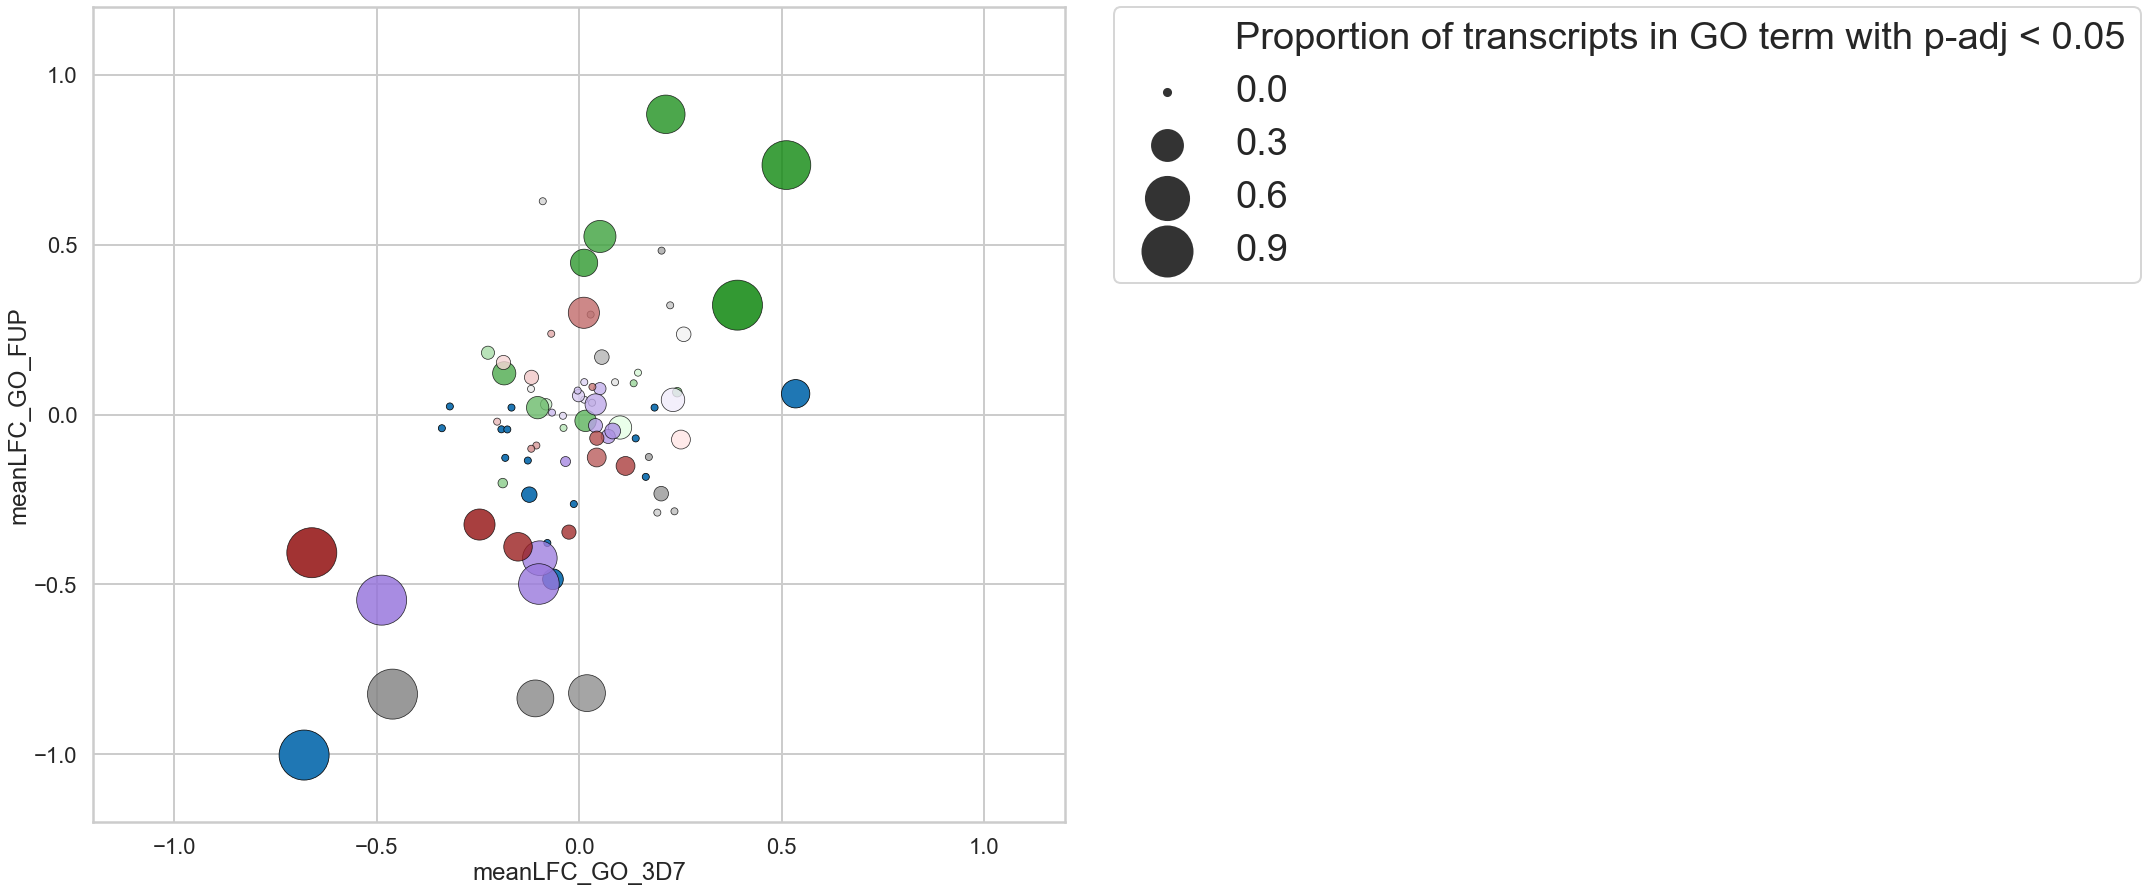

In [66]:
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x="meanLFC_GO_3D7", y="meanLFC_GO_FUP", data=data_merge[data_merge['GO_term'] == 'nucleosome'] , 
                     size = 'Proportion of transcripts in GO term with p-adj < 0.05', 
                     edgecolor='black', sizes= (50,2500), 
#                      hue='HPI', palette = sns.light_palette('blue', n_colors=16), alpha = .8,
                      legend='brief')


ax = sns.scatterplot(x="meanLFC_GO_3D7", y="meanLFC_GO_FUP", data=data_merge[data_merge['GO_term'] == 'cysteine-type peptidase activity'] , 
                     size = 'Proportion of transcripts in GO term with p-adj < 0.05', 
                     edgecolor='black', sizes= (50,2500), 
                     hue='HPI', palette = sns.light_palette('gray', n_colors=16), 
                     alpha = .8,
                      legend=False)
# plt.setp(ax2, xlim=(-1,1), ylim=(-1,1))


ax = sns.scatterplot(x="meanLFC_GO_3D7", y="meanLFC_GO_FUP", data=data_merge[data_merge['GO_term'] == 'Maurer\'s cleft'] , 
                     size = 'Proportion of transcripts in GO term with p-adj < 0.05', 
                     edgecolor='black', sizes= (50,2500), 
                     hue='HPI', palette = sns.light_palette('green', n_colors=16), alpha = .8,
                      legend=False)
# plt.setp(ax3, xlim=(-1,1), ylim=(-1,1))


ax = sns.scatterplot(x="meanLFC_GO_3D7", y="meanLFC_GO_FUP", data=data_merge[data_merge['GO_term'] == 'endoplasmic reticulum'] , 
                     size = 'Proportion of transcripts in GO term with p-adj < 0.05', 
                     edgecolor='black', sizes= (50,2500), 
                     hue='HPI', palette = sns.light_palette('mediumpurple', n_colors=16), alpha = .8,
                      legend=False)

ax = sns.scatterplot(x="meanLFC_GO_3D7", y="meanLFC_GO_FUP", data=data_merge[data_merge['GO_term'] == 'tricarboxylic acid cycle'] , 
                     size = 'Proportion of transcripts in GO term with p-adj < 0.05', 
                     edgecolor='black', sizes= (50,2500), 
                     hue='HPI', palette = sns.light_palette('darkred', n_colors=16), alpha = .8,
                      legend=False)


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 38})
plt.gcf().subplots_adjust(right=.8)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)